## 목차
1. [경진대회 이해](#경진대회-이해)    
2. [경진대회 접속 방법 및 세부 메뉴](#경진대회-접속-방법-및-세부-메뉴)  
    2.1. [경진대회 접속 방법](#경진대회-접속-방법)  
    2.2. [경진대회 메뉴 설명](#경진대회-메뉴-설명)  
3. [탐색적 데이터 분석](#탐색적-데이터-분석)  
    3.1. [캐글 노트북 환경 설정](#캐글-노트북-환경-설정)  
    3.2. [데이터 둘러보기](#데이터-둘러보기)  
    3.3. [더 효과적인 분석을 위한 피쳐 엔지니어링](#더-효과적인-분석을-위한-피쳐-엔지니어링)  
    3.4. [데이터 시각화](#데이터-시각화)  
4. [베이스라인 모델](#베이스라인-모델)  
    4.1. [피쳐 엔지니어링](#피쳐-엔지니어링)  
    4.2. [평가지표 계산 함수 작성](#평가지표-계산-함수-작성)  
    4.3. [모델 훈련](#모델-훈련)  
    4.4. [모델 성능 검증](#모델-성능-검증-1)  
    4.5. [예측 및 결과 제출](#예측-및-결과-제출-1)  
5. [성능 개선1:릿지 회귀 모델](#성능-개선1:릿지-회귀-모델)  
    5.1. [하이퍼파라미터 최적화(모델 훈련)](#하이퍼파라미터-최적화모델-훈련-1)  
    5.2. [성능 검증](#성능-검증)  
6. [성능 개선2:라쏘 회귀 모델](#성능-개선2:라쏘-회귀-모델)  
7. [성능 개선3:랜덤 포레스트 회귀 모델](#성능-개선3:랜덤-포레스트-회귀-모델)  
    7.1. [하이퍼파라미터 최적화(모델 훈련)](#하이퍼파라미터-최적화모델-훈련-2)  
    7.2. [모델 성능 검증](#모델-성능-검증-2)  
    7.3. [예측 및 결과 제출](#예측-및-결과-제출-2)  
8. [학습 마무리](#학습-마무리)  
    8.1. [핵심 요약](#핵심-요약)

<a name="경진대회-이해"></a>
# 경진대회 이해

<a name="경진대회-접속-방법-및-세부-메뉴"></a>
# 경진대회 접속 방법 및 세부 메뉴

<a name="경진대회-접속-방법"></a>
## 경진대회 접속 방법

<a name="경진대회-메뉴-설명"></a>
## 경진대회 메뉴 설명

<a name="탐색적-데이터-분석"></a>
# 탐색적 데이터 분석

<a name="캐글-노트북-환경-설정"></a>
## 캐글 노트북 환경 설정

<a name="데이터-둘러보기"></a>
## 데이터 둘러보기

In [90]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

data_path = './dataset/bike-sharing-demand/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'submission.csv')

In [91]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [94]:
train = train.drop(columns=['casual','registered'])

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


<a name="더-효과적인-분석을-위한-피쳐-엔지니어링"></a>
## 더 효과적인 분석을 위한 피쳐 엔지니어링

In [96]:
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second
train['weekday'] = pd.to_datetime(train['datetime']).dt.weekday
# train['day_name'] = pd.to_datetime(train['datetime']).dt.day_name()
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0,0,5


In [97]:
train['season'] = train['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
})
train['weather'] = train['weather'].map({
    1: 'Clear',
    2: 'Mist, Few clouds',
    3: 'Light Snow, Rain, Thunderstorm',
    4: 'Heavy Rain, Thunderstorm, Snow, Fog'
})
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,32,2011,1,1,2,0,0,5


In [98]:
train.drop(columns=['datetime'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,weekday
0,Spring,0,0,Clear,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0,5
1,Spring,0,0,Clear,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0,5
2,Spring,0,0,Clear,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0,5
3,Spring,0,0,Clear,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0,5
4,Spring,0,0,Clear,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0,1,Clear,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0,2
10882,Winter,0,1,Clear,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0,2
10883,Winter,0,1,Clear,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0,2
10884,Winter,0,1,Clear,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0,2


<a name="데이터-시각화"></a>
## 데이터 시각화

In [99]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<a name="데이터-시각화displot"></a>

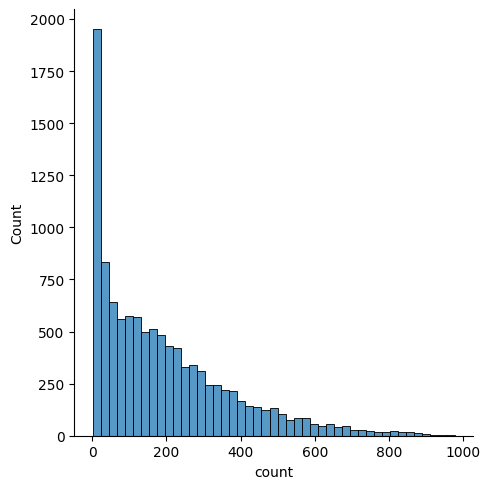

In [100]:
sns.displot(train['count'])

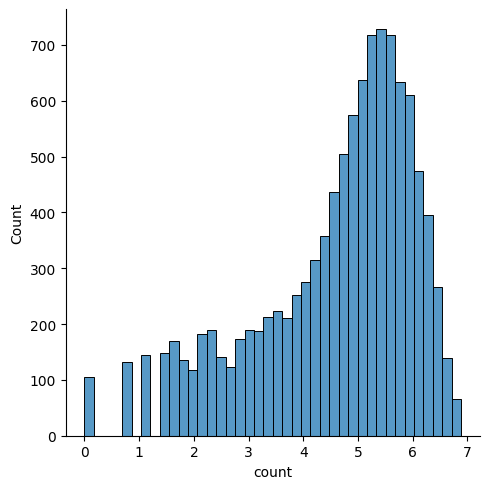

In [101]:
sns.displot(np.log(train['count']))

<a name="데이터-시각화barplot"></a>

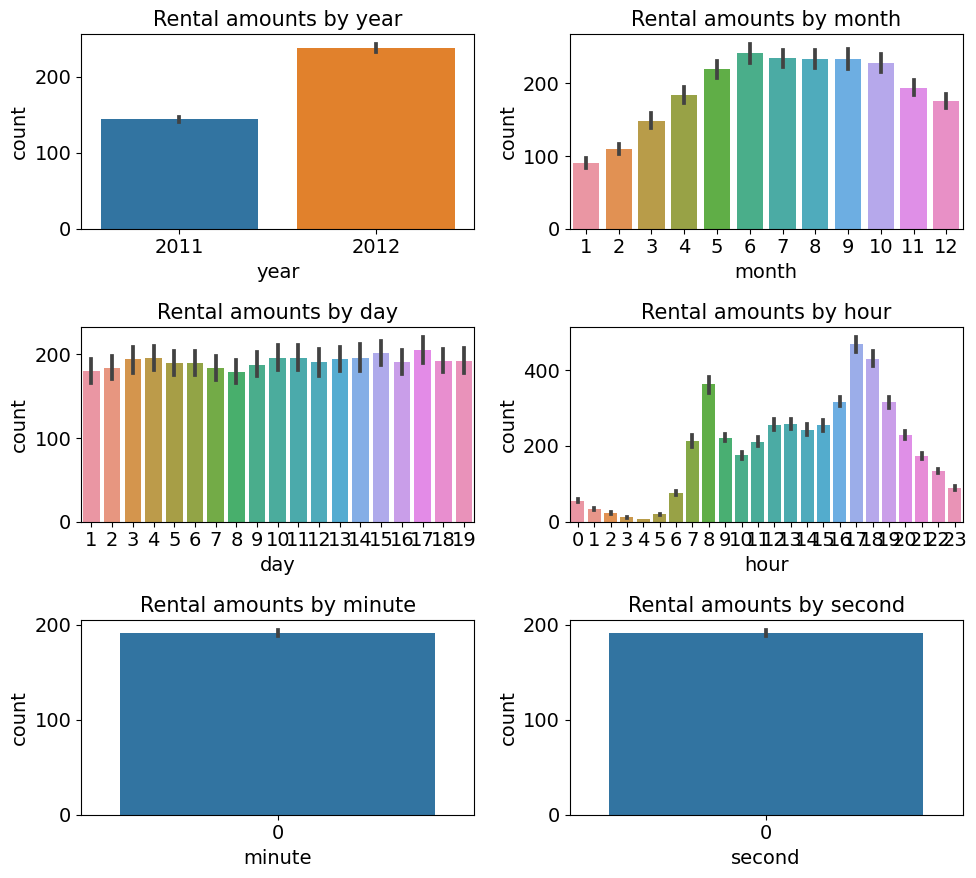

In [118]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)

figure, axes= plt.subplots(3,2)
figure.set_size_inches(10,9)
sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])
axes[0,0].set(title="Rental amounts by year")
axes[0,1].set(title="Rental amounts by month")
axes[1,0].set(title="Rental amounts by day")
axes[1,1].set(title="Rental amounts by hour")
axes[2,0].set(title="Rental amounts by minute")
axes[2,1].set(title="Rental amounts by second")
axes[0,0].tick_params(axis='y', labelrotation=0)
plt.tight_layout()

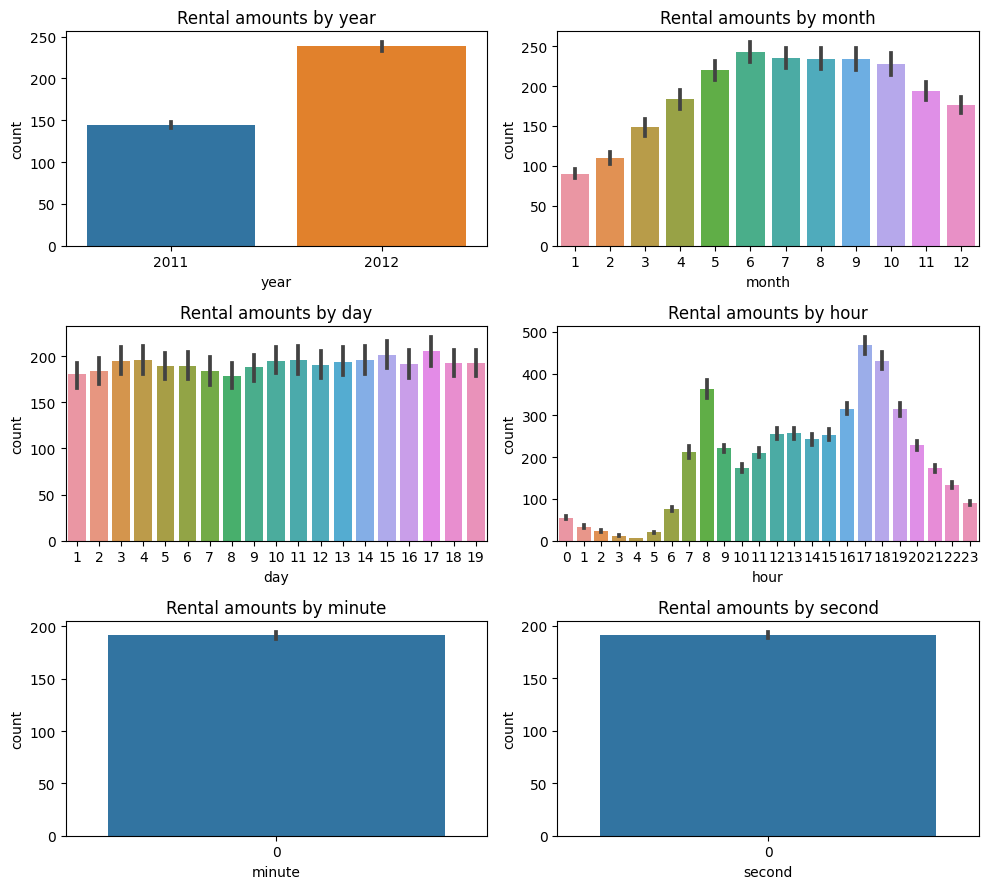

In [111]:
plt.figure(figsize=(10,9))
plt.subplot(3, 2, 1)
sns.barplot(x='year', y='count', data=train)
plt.title("Rental amounts by year")
plt.subplot(3, 2, 2)
sns.barplot(x='month', y='count', data=train)
plt.title("Rental amounts by month")
plt.subplot(3, 2, 3)
sns.barplot(x='day', y='count', data=train)
plt.title("Rental amounts by day")
plt.subplot(3, 2, 4)
sns.barplot(x='hour', y='count', data=train)
plt.title("Rental amounts by hour")
plt.subplot(3, 2, 5)
sns.barplot(x='minute', y='count', data=train)
plt.title("Rental amounts by minute")
plt.subplot(3, 2, 6)
sns.barplot(x='second', y='count', data=train)
plt.title("Rental amounts by second")
plt.tight_layout()

minute, second 필요없음
day 19일에서 짤림

<a name="데이터-시각화boxplot"></a>

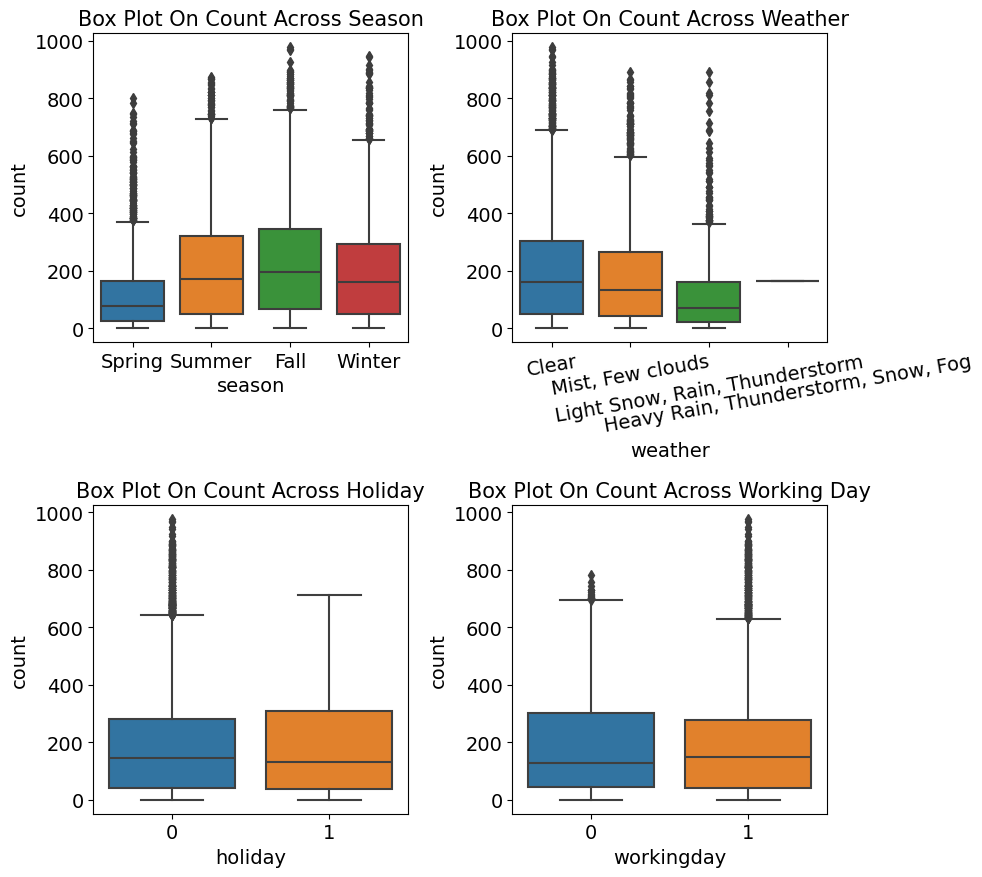

In [122]:
figure, axes= plt.subplots(2,2)
figure.set_size_inches(10,9)
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])
axes[0,0].set(title="Box Plot On Count Across Season")
axes[0,1].set(title="Box Plot On Count Across Weather")
axes[0,1].tick_params(axis='x', labelrotation=10)
axes[1,0].set(title="Box Plot On Count Across Holiday")
axes[1,1].set(title="Box Plot On Count Across Working Day")
plt.tight_layout()

전체적으로 outlier가 많음

<a name="데이터-시각화boxplot"></a>

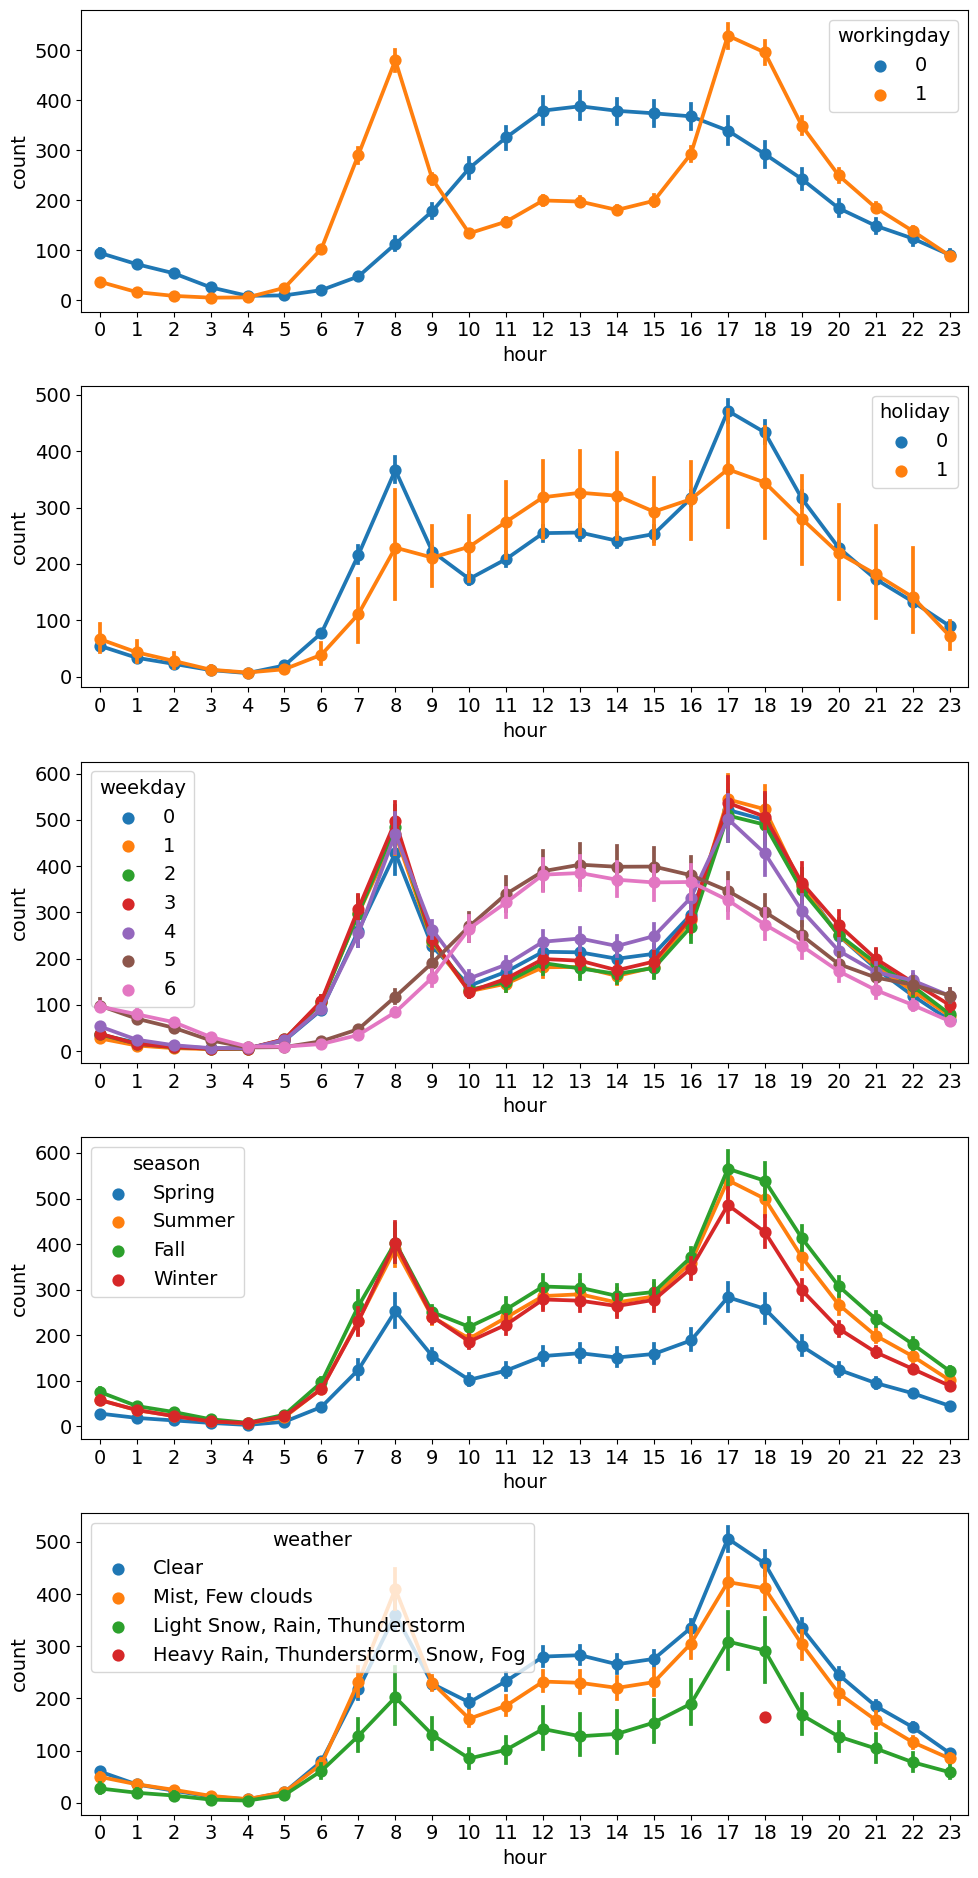

In [128]:
figure, axes= plt.subplots(5)
figure.set_size_inches(10,19)
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])
plt.tight_layout()

In [ ]:
<a name="데이터-시각화regplot"></a>

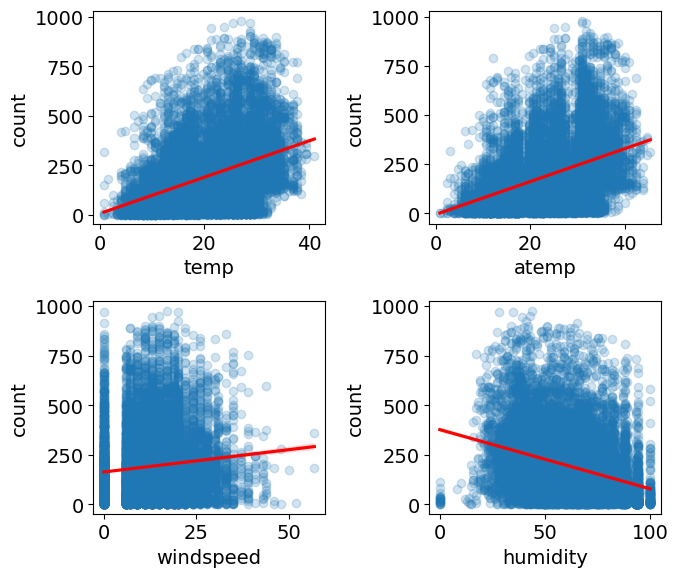

In [132]:
figure, axes= plt.subplots(2, 2)
figure.set_size_inches(7,6)
sns.regplot(x='temp', y='count', data=train, ax=axes[0,0], scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1], scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0], scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1], scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.tight_layout()

windspeed 신뢰도 없음

<a name="데이터-시각화heatmap"></a>

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

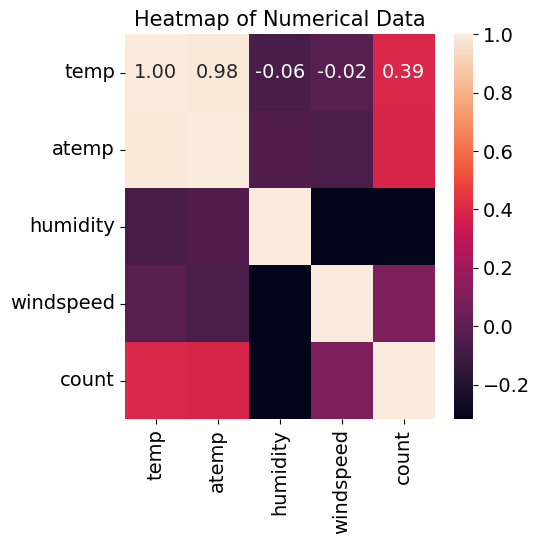

In [153]:
train_corr = train.loc[:,['temp','atemp','humidity','windspeed','count']].corr()
train_corr
figure, axes= plt.subplots()
figure.set_size_inches(5,5)
sns.heatmap(train_corr, annot=True, fmt='.2f')
axes.set(title='Heatmap of Numerical Data')

<a name="베이스라인-모델"></a>
# 베이스라인 모델

In [155]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

data_path = './dataset/bike-sharing-demand/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'submission.csv')

<a name="피쳐-엔지니어링"></a>
## 피쳐 엔지니어링

In [156]:
all_data = pd.concat([train, test], ignore_index = True)
all_data.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [159]:
all_data['date'] = pd.to_datetime(all_data['datetime']).dt.date
all_data['year'] = pd.to_datetime(all_data['datetime']).dt.year
all_data['month'] = pd.to_datetime(all_data['datetime']).dt.month
all_data['day'] = pd.to_datetime(all_data['datetime']).dt.day
all_data['hour'] = pd.to_datetime(all_data['datetime']).dt.hour
all_data['weekday'] = pd.to_datetime(all_data['datetime']).dt.weekday
all_data.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,31,21,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,31,22,0
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,31,23,0


In [161]:
all_data = all_data.drop(columns=['casual','registered','month','datetime','date','windspeed'])
all_data.tail(3)

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,day,hour,weekday
17376,1,0,1,1,10.66,12.880,60,NaN,2012,31,21,0
17377,1,0,1,1,10.66,13.635,56,NaN,2012,31,22,0
17378,1,0,1,1,10.66,13.635,65,NaN,2012,31,23,0


In [175]:
X_train_index = all_data[~all_data['count'].isnull()].index.to_list()
X_test_index = all_data[all_data['count'].isnull()].index.to_list()

<a name="평가지표-계산-함수-작성"></a>
## 평가지표 계산 함수 작성

In [187]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_real, y_pred, convert_exp=True):
    if convert_exp:
        y_real = np.exp(y_real)
        y_pred = np.exp(y_pred)

    return mean_squared_log_error(y_real, y_pred)

<a name="모델-훈련"></a>
## 모델 훈련

In [190]:
from sklearn.linear_model import LinearRegression
import numpy as np

linear_reg_model = LinearRegression()

linear_reg_model.fit(all_data.iloc[X_train_index].drop(columns=['count']), np.log(all_data.iloc[X_train_index]['count']))

LinearRegression()

<a name="모델-성능-검증-1"></a>
## 모델 성능 검증

In [191]:
preds = linear_reg_model.predict(all_data.iloc[X_train_index].drop(columns=['count']))

print(f'linear reg\'s RMSLE : {rmsle(np.log(all_data.iloc[X_train_index]["count"]), preds, True):.4f}')

linear reg's RMSLE : 1.0410


<a name="예측-및-결과-제출-1"></a>
## 예측 및 결과 제출

In [192]:
preds = linear_reg_model.predict(all_data.iloc[X_test_index].drop(columns=['count']))

submission['count'] = np.exp(preds)
# submission.to_csv('submission.csv',index=False)

<a name="성능-개선1:릿지-회귀-모델"></a>
# 성능 개선1:릿지 회귀 모델

<a name="하이퍼파라미터-최적화모델-훈련-1"></a>
## 하이퍼파라미터 최적화(모델 훈련)

In [195]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [206]:
ridge_params = {'max_iter':[500, 1000, 2000, 3000, 4000], 'alpha':[0.1, 1, 2, 3, 4, 5]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

grid_search_ridge_model = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_params,
    scoring=rmsle_scorer,
    cv=5
)

In [207]:
grid_search_ridge_model.fit(all_data.iloc[X_train_index].drop(columns=['count']), np.log(all_data.iloc[X_train_index]['count']))

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 5],
                         'max_iter': [500, 1000, 2000, 3000, 4000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [208]:
print('최적의 하이퍼 파라미터 : ', grid_search_ridge_model.best_params_)

최적의 하이퍼 파라미터 :  {'alpha': 0.1, 'max_iter': 500}


<a name="성능-검증"></a>
## 성능 검증

In [209]:
preds = grid_search_ridge_model.best_estimator_.predict(all_data.iloc[X_train_index].drop(columns=['count']))

print(f'ridge model\'s RMSLE : {rmsle(np.log(all_data.iloc[X_train_index]["count"]), preds, True):.4f}')

ridge model's RMSLE : 1.0410


<a name="성능-개선2:라쏘-회귀-모델"></a>
# 성능 개선2:라쏘 회귀 모델

In [210]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

lasso_model = Lasso()

In [215]:
lasso_params = {'max_iter':[500, 1000, 2000, 3000, 4000], 'alpha':[0.001, 0.003, 0.1, 1, 2, 3, 4, 5]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

grid_search_lasso_model = GridSearchCV(
    estimator=lasso_model,
    param_grid=lasso_params,
    scoring=rmsle_scorer,
    cv=5
)

In [216]:
grid_search_lasso_model.fit(all_data.iloc[X_train_index].drop(columns=['count']), np.log(all_data.iloc[X_train_index]['count']))

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.003, 0.1, 1, 2, 3, 4, 5],
                         'max_iter': [500, 1000, 2000, 3000, 4000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [217]:
print('최적의 하이퍼 파라미터 : ', grid_search_lasso_model.best_params_)

최적의 하이퍼 파라미터 :  {'alpha': 0.001, 'max_iter': 500}


In [218]:
preds = grid_search_lasso_model.best_estimator_.predict(all_data.iloc[X_train_index].drop(columns=['count']))

print(f'lasso model\'s RMSLE : {rmsle(np.log(all_data.iloc[X_train_index]["count"]), preds, True):.4f}')

lasso model's RMSLE : 1.0410


<a name="성능-개선3:랜덤-포레스트-회귀-모델"></a>
# 성능 개선3:랜덤 포레스트 회귀 모델

<a name="하이퍼파라미터-최적화모델-훈련-2"></a>
## 하이퍼파라미터 최적화(모델 훈련)

In [219]:
from sklearn.ensemble import RandomForestRegressor

randomforest_reg_model = RandomForestRegressor()

In [222]:
randomforest_params = {'n_estimators':[100, 120, 140], 'random_state':[0]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

grid_search_randomforest_model = GridSearchCV(
    estimator=randomforest_reg_model,
    param_grid=randomforest_params,
    scoring=rmsle_scorer,
    cv=5
)

In [223]:
grid_search_randomforest_model.fit(all_data.iloc[X_train_index].drop(columns=['count']), np.log(all_data.iloc[X_train_index]['count']))

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 120, 140], 'random_state': [0]},
             scoring=make_scorer(rmsle, greater_is_better=False))

<a name="모델-성능-검증-2"></a>
## 모델 성능 검증

In [224]:
print('최적의 하이퍼 파라미터 : ', grid_search_randomforest_model.best_params_)

최적의 하이퍼 파라미터 :  {'n_estimators': 140, 'random_state': 0}


In [225]:
preds = grid_search_randomforest_model.best_estimator_.predict(all_data.iloc[X_train_index].drop(columns=['count']))

print(f'randomforest model\'s RMSLE : {rmsle(np.log(all_data.iloc[X_train_index]["count"]), preds, True):.4f}')

randomforest model's RMSLE : 0.0123


<a name="예측-및-결과-제출-2"></a>
## 예측 및 결과 제출

In [ ]:
submission['count'] = np.exp(preds)
# submission.to_csv('submission.csv',index=False)

<a name="학습-마무리"></a>
# 학습 마무리

<a name="핵심-요약"></a>
## 핵심 요약